# **Logistic Regression Model**

Importing the dataset

In [ ]:
import requests

# URL of the CSV file from Google Drive
file_id = '1KYF4cDlbsEUIDdN25FHuNUsOfYSSfLnO'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the response to a file
    with open('heart.csv', 'wb') as f:
        f.write(response.content)
    print('File downloaded successfully.')
else:
    print(f'Failed to download the file. Status code: {response.status_code}')

File downloaded successfully.


Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd

# Load libraries
from sklearn.linear_model import LogisticRegression # Import Logistic Regression model
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

Loading Data

In [ ]:
col_names = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'Cholestoral_group', 'HR_Groups','blood_pressure_group','Sex','ExerciseAngina','age_group','HeartDisease']

data = pd.read_csv('heart.csv', skiprows=1, header=None, names=col_names)
data.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,Cholestoral_group,HR_Groups,blood_pressure_group,Sex,ExerciseAngina,age_group,HeartDisease
0,0.244898,0.615385,0.703308,0.777778,0.350877,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1,2,1,0,0,0
1,0.428571,0.871795,0.395314,0.659259,0.526316,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,1,2,0,0,1,1
2,0.183673,0.487179,0.686354,0.229630,0.350877,1.0,0.0,0.0,0.0,1.0,0.0,1.0,2,0,2,1,0,0,0
3,0.408163,0.589744,0.491385,0.303704,0.614035,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,2,0,1,1,1
4,0.530612,0.743590,0.437698,0.407407,0.350877,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1,1,2,1,0,1,0
5,0.224490,0.358974,0.844590,0.762963,0.350877,0.0,1.0,0.0,1.0,0.0,0.0,1.0,2,1,1,1,0,0,0
6,0.346939,0.487179,0.556375,0.762963,0.350877,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,2,0,0,1,0
7,0.530612,0.230769,0.474431,0.555556,0.350877,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,1,1,0,1,0
8,0.183673,0.615385,0.471606,0.466667,0.614035,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1,2,1,1,0,1
9,0.408163,0.358974,0.689180,0.392593,0.350877,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1,1,0,0,1,0


In [ ]:
data.shape

(808, 19)

**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [ ]:
#split dataset in features and target variable
feature_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'Cholestoral_group', 'HR_Groups','blood_pressure_group','Sex','ExerciseAngina','age_group']
x = data[feature_cols] # Features
y = data.HeartDisease # Target variable

**Splitting Data**

To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [ ]:
# Split dataset into training set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=8) # 75% training and 25% test

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(606, 18)
(202, 18)
(606,)
(202,)


**Building Logistic Regression Model**

Let's create a logistic regression model using Scikit-learn.

In [ ]:
# Create Logistic regression classifer object
clf = LogisticRegression()

# Train Logistic regression Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
prediction = clf.predict(x_test)

**Evaluating the Model**

Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8861386138613861


In [ ]:
score = clf.score(x_test, y_test)
print(score)

0.8861386138613861


In [ ]:
# for i in range(0,100):
#   x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i) # 85% training and 15% test

#     # Create Logistic regression classifer object
#   clf = LogisticRegression()

#   # Train Logistic regression Classifer
#   clf = clf.fit(x_train,y_train)

#   #Predict the response for test dataset
#   y_pred = clf.predict(x_test)

#   print("Accuracy for RS(",i,"):",metrics.accuracy_score(y_test, y_pred))

**Receiver operating characteristic (ROC)**

A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

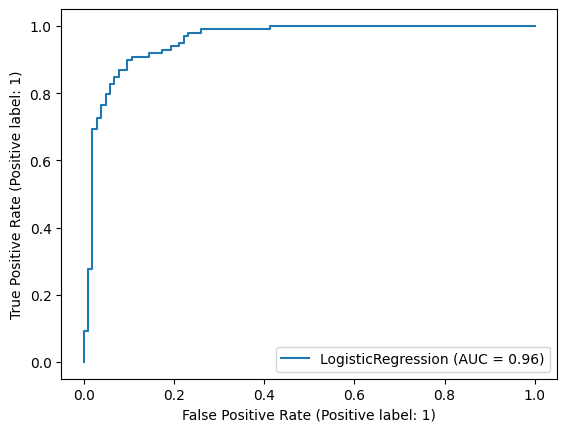

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

svc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.show()

**Confusion Matrix**

A confusion matrix is a table that is used to evaluate the performance of a binary classifier system. It provides a detailed breakdown of the classification outcomes and allows for the visualization of the performance of the algorithm by displaying the counts of true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions.

In [ ]:
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[94 10]
 [11 87]]


Text(0.5, 1.0, 'Accuracy Score: 0.8960396039603961')

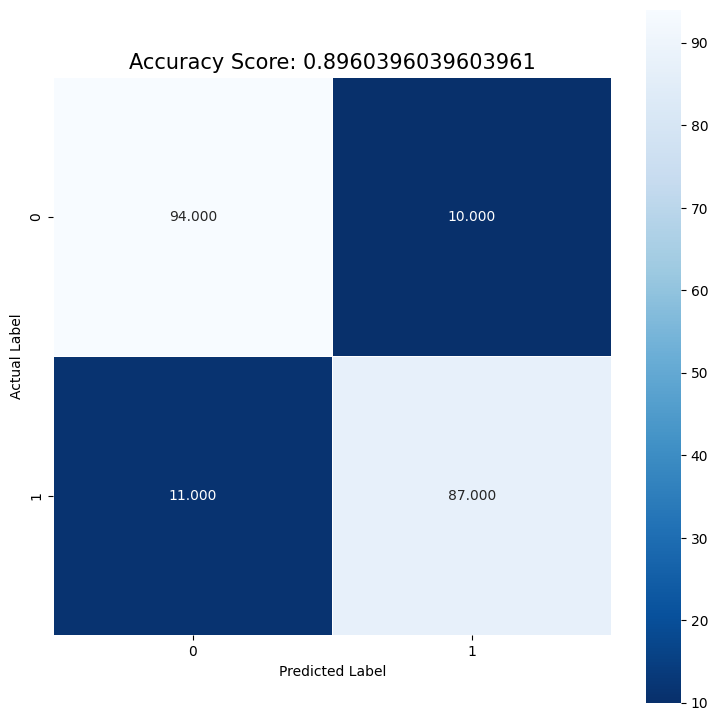

In [ ]:
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size=15)

Using the model to predict target of a single test data

In [ ]:
# Building a Predictive System
input_data = (0.314489796,0.328974359,0.814589924,0.732962963,0.300877193,0,1,0,1,0,0,1,2,1,1,1,0,0)

# change the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

feature_names = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'Cholestoral_group', 'HR_Groups','blood_pressure_group','Sex','ExerciseAngina','age_group']
input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

prediction = clf.predict(input_data_df)

if (prediction[0]==0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

The person does not have a heart disease


In [ ]:
param_grid = [
    # ElasticNet with saga solver
    {
        'solver': ['saga'],
        'penalty': ['elasticnet'],
        'l1_ratio': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'C': np.logspace(-10, 10, 10),
        'max_iter': [100, 500, 1000, 2500, 5000],
        'tol': [1e-4, 1e-3, 1e-2,1e-5, 1e-6, 1e-7],
        'fit_intercept': [True, False]
    }
]

logModel = LogisticRegression()

from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(logModel, param_grid=param_grid, cv=3, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train, y_train)


Fitting 3 folds for each of 6600 candidates, totalling 19800 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=0.07742636826811278, l1_ratio=0.3, max_iter=2500,
                   penalty='elasticnet', solver='saga', tol=0.01)

In [ ]:
model = LogisticRegression(C=0.07742636826811278, l1_ratio=0.3, max_iter=2500, penalty='elasticnet', solver='saga', tol=0.01)

model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

print("Accuracy for RS:",metrics.accuracy_score(y_test, y_pred))

Accuracy for RS: 0.8811881188118812
